In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving pattern.tif to pattern (1).tif


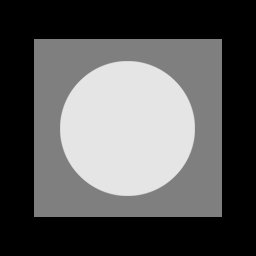

In [18]:
from google.colab import files
myfile = files.upload()

I = cv2.imread('pattern.tif', cv2.IMREAD_GRAYSCALE)

from google.colab.patches import cv2_imshow 
cv2_imshow(I)

In [19]:
#Step2 Gaussian noise 생성함수

def GaussianNoise(image, std=5):
    height, width = image.shape
    # 평균이 0 표준편차가 5인 noise
    gaussian_noise = std * np.random.randn(height, width) + 0
    return gaussian_noise

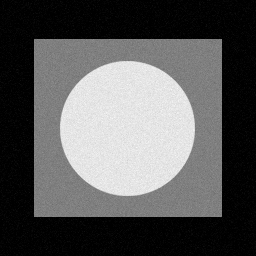

In [23]:
#Step3 Gaussian noise와 원본이미지를 더해 Noisy image 만들기
Noisy_I = I + GaussianNoise(I)

Noisy_I = np.clip(Noisy_I , 0 , 255)

#Convert back to uint8
Noisy_I = cv2.convertScaleAbs(Noisy_I)

cv2_imshow(Noisy_I)

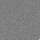

Sub image의 평균값 : 126.968125
Sub image의 표준편차 : 5.388145226733871


In [24]:
#Step 5 Step3의 결과에서 밝기 값이 비슷한 가로, 세로 길이 40x40 픽셀의 sub image(e.g. x:41~80, y: 41~80)를 만드세요. 그리고 sub image의 평균값을 구하세요.

Noisy_I_Sub = Noisy_I[41:81, 41:81]
Noisy_I_Sub_mean = Noisy_I_Sub.mean()


cv2_imshow(Noisy_I_Sub)

#Step 7 sub image의 평균값과 표준편차를 구해서 보여주세요
print("Sub image의 평균값 :",Noisy_I_Sub.mean())
print("Sub image의 표준편차 :",Noisy_I_Sub.std())

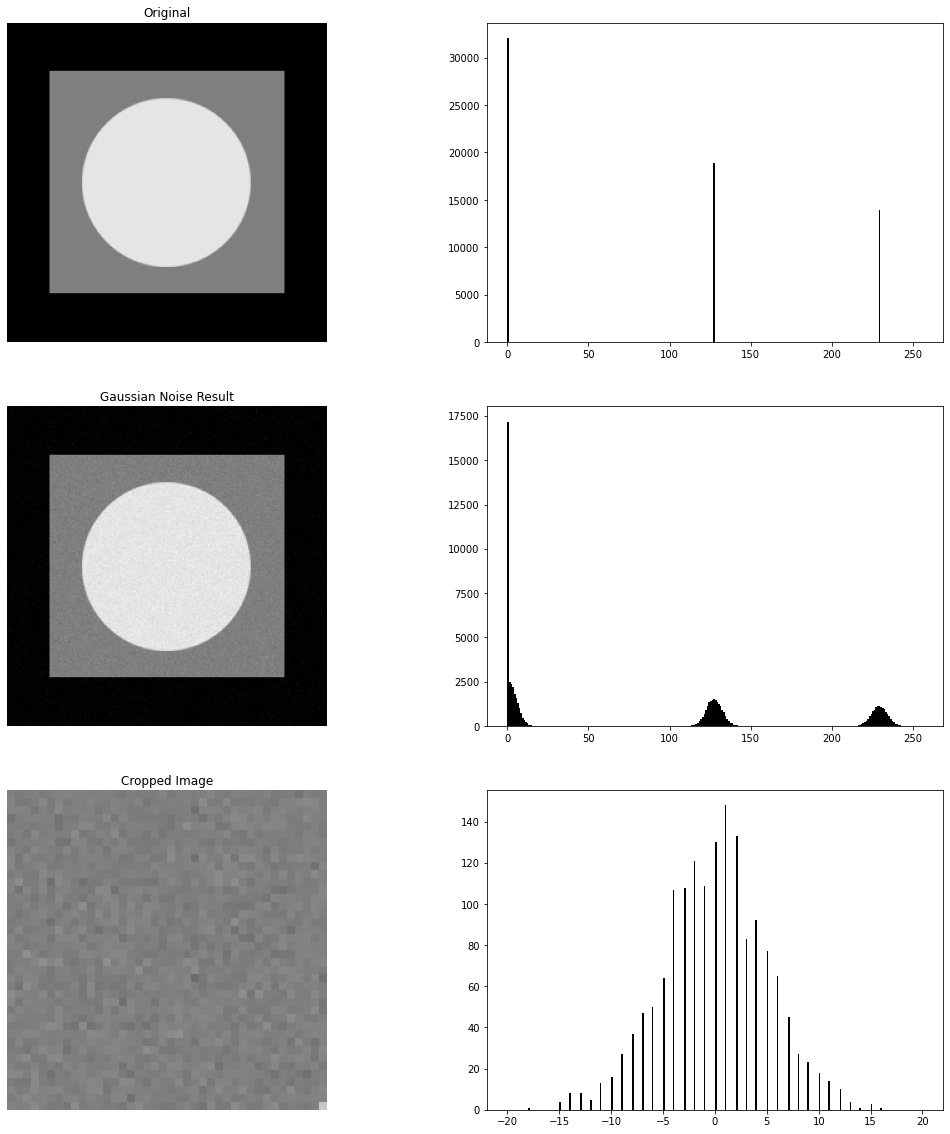

In [25]:
#Step4,6 원본 이미지와 Step3의 결과의 Histogram을 보여주세요,  Step5에서 구한 평균값을 뺀 결과의 histogram을 구하여 가우시안 모양으로나오는지 확인하세요


fig = plt.figure(figsize = (18, 20)) 
rows = 3
cols = 2
  
ax1 = fig.add_subplot(rows, cols, 1)
I_RGB = cv2.cvtColor(I, cv2.COLOR_GRAY2RGB)
ax1.imshow(I_RGB)
ax1.set_title('Original')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.hist(I.flatten(),256,[0,256], color = 'black')

ax3 = fig.add_subplot(rows, cols, 3)
Noisy_I_RGB = cv2.cvtColor(Noisy_I, cv2.COLOR_GRAY2RGB)
ax3.imshow(Noisy_I_RGB)
ax3.set_title('Gaussian Noise Result')
ax3.axis("off")
 
ax4 = fig.add_subplot(rows, cols, 4)
ax4.hist(Noisy_I.flatten(),256,[0,256], color = 'black')

ax5 = fig.add_subplot(rows, cols, 5)
Noisy_I_Sub_RGB = cv2.cvtColor(Noisy_I_Sub, cv2.COLOR_GRAY2RGB)
ax5.imshow(Noisy_I_Sub_RGB)
ax5.set_title('Cropped Image')
ax5.axis("off")
 
ax6 = fig.add_subplot(rows, cols, 6)
ax6.hist((Noisy_I_Sub - Noisy_I_Sub_mean).flatten(),256,[-20,20], color = 'black')

plt.show()